<a href="https://colab.research.google.com/github/ArtuomMerkulov/Font_recognition/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BD%D0%B0%D0%B4_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%BE%D0%BC_%D0%B8_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D1%88%D1%80%D0%B8%D1%84%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка датасета и обучение модели

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/font_recognition.zip

Archive:  /content/font_recognition.zip
   creating: font_recognition/
  inflating: font_recognition/task.txt  
   creating: font_recognition/fonts/
   creating: font_recognition/fonts/Realest/
  inflating: font_recognition/fonts/Realest/Realest-Extended.otf  
  inflating: font_recognition/fonts/Realest/READ ME.pdf  
  inflating: font_recognition/fonts/Realest/COPYRIGHT.txt  
   creating: font_recognition/fonts/Aguante/
  inflating: font_recognition/fonts/Aguante/Aguante-Regular.otf  
  inflating: font_recognition/fonts/Aguante/CC Attribution-ShareAlike 3.0 Unported.txt  
  inflating: font_recognition/fonts/Aguante/COPYRIGHT.txt  
  inflating: font_recognition/fonts/Aguante/LICENSE.txt  
   creating: font_recognition/fonts/Brass Mono/
  inflating: font_recognition/fonts/Brass Mono/BrassMono-Regular.ttf  
  inflating: font_recognition/fonts/Brass Mono/BrassMono-Italic.ttf  
  inflating: font_recognition/fonts/Brass Mono/BrassMono-Bold.ttf  
  inflating: font_recognition/fonts/Brass Mono

In [3]:
!pip install pillow fonttools

In [5]:
import os
import shutil

# Установка исходной и целевой директорий
source_dir = '/content/font_recognition/fonts'
target_dir = '/content/font_dir'

# Создание целевой папки, если она еще не существует
if not os.path.exists(target_dir):
    os.makedirs(target_dir)

# Перебор папок в исходной директории
for folder_name in os.listdir(source_dir):
    folder_path = os.path.join(source_dir, folder_name)

    # Проверка, что это действительно папка
    if os.path.isdir(folder_path):
        # Перебор файлов в папке
        for filename in os.listdir(folder_path):
            # Проверка, что файл имеет расширение .ttf или .otf
            if filename.endswith('.ttf') or filename.endswith('.otf'):
                # Формирование путей для исходного и целевого файлов
                source_file = os.path.join(folder_path, filename)
                target_file = os.path.join(target_dir, filename)

                # Копирование файла в целевую папку
                shutil.copy(source_file, target_file)
                print(f'Скопирован файл: {filename}')

Скопирован файл: BrassMono-Regular.ttf
Скопирован файл: BrassMono-Italic.ttf
Скопирован файл: BrassMono-BoldItalic.ttf
Скопирован файл: BrassMono-Bold.ttf
Скопирован файл: better-vcr-5.2.ttf
Скопирован файл: TanaUncialSP.otf
Скопирован файл: GhastlyPanicCyr.otf
Скопирован файл: GaneshaType-Regular.ttf
Скопирован файл: AlumniSansCollegiateOne-Italic.ttf
Скопирован файл: AlumniSansCollegiateOne-Regular.ttf
Скопирован файл: ArefRuqaaInk-Regular.ttf
Скопирован файл: ArefRuqaaInk-Bold.ttf
Скопирован файл: Realest-Extended.otf
Скопирован файл: Aguante-Regular.otf
Скопирован файл: ambidexter_regular.otf


In [6]:
import os
import random
from PIL import Image, ImageFont, ImageDraw
from fontTools.ttLib import TTFont

def convert_font_to_txt(font_file):
    font = TTFont(font_file)
    font_name = font['name'].getName(1, 3, 1).toUnicode()
    txt_file = os.path.splitext(font_file)[0] + '.txt'
    with open(txt_file, 'w') as f:
        f.write(font_name)
    return txt_file

def generate_image(font_file, text, size, save_path):
    font = ImageFont.truetype(font_file, size)
    img = Image.new('RGB', (1000, 100), color='white')
    draw = ImageDraw.Draw(img)
    draw.text((10, 10), text, font=font, fill='black')
    img.save(save_path)

def generate_dataset(fonts_dir, output_dir, num_images_per_font, train_ratio=0.8):
    # Создаем выходную папку, если она не существует
    os.makedirs(output_dir, exist_ok=True)

    font_files = [f for f in os.listdir(fonts_dir) if f.endswith('.ttf') or f.endswith('.otf')]
    num_fonts = len(font_files)
    num_train_images = int(num_images_per_font * train_ratio)
    num_test_images = num_images_per_font - num_train_images

    # Создаем папки train и test, если они не существуют
    train_dir = os.path.join(output_dir, 'train')
    os.makedirs(train_dir, exist_ok=True)
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(test_dir, exist_ok=True)

    for i, font_file in enumerate(font_files):
        font_path = os.path.join(fonts_dir, font_file)
        txt_file = convert_font_to_txt(font_path)
        font_name = os.path.splitext(font_file)[0]

        for j in range(num_train_images):
            text = ''.join(random.choices('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ', k=10))
            save_path = os.path.join(train_dir, f'{font_name}_{j}.jpg')
            generate_image(font_path, text, 80, save_path)

        for j in range(num_test_images):
            text = ''.join(random.choices('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ', k=10))
            save_path = os.path.join(test_dir, f'{font_name}_{j}.jpg')
            generate_image(font_path, text, 80, save_path)

        print(f'Generated images for font {i+1}/{num_fonts}: {font_name}')

# Использования (Переношу файл ttf и otf в font_dir, и создаем файл в output_dir)
fonts_dir = '/content/font_dir'
output_dir = '/content/output_dir'
num_images_per_font = 100

generate_dataset(fonts_dir, output_dir, num_images_per_font)

Generated images for font 1/15: BrassMono-Regular
Generated images for font 2/15: AlumniSansCollegiateOne-Italic
Generated images for font 3/15: TanaUncialSP
Generated images for font 4/15: BrassMono-Italic
Generated images for font 5/15: ArefRuqaaInk-Regular
Generated images for font 6/15: better-vcr-5.2
Generated images for font 7/15: Aguante-Regular
Generated images for font 8/15: GhastlyPanicCyr
Generated images for font 9/15: Realest-Extended
Generated images for font 10/15: ArefRuqaaInk-Bold
Generated images for font 11/15: BrassMono-BoldItalic
Generated images for font 12/15: GaneshaType-Regular
Generated images for font 13/15: AlumniSansCollegiateOne-Regular
Generated images for font 14/15: BrassMono-Bold
Generated images for font 15/15: ambidexter_regular


In [7]:
import os
import shutil

# Задайте путь к вашим папкам с обучающим и тестовым наборами данных
train_data_dir = '/content/output_dir/train'
test_data_dir = '/content/output_dir/test'

# Функция для организации изображений
def organize_images(data_dir):
    for image_name in os.listdir(data_dir):
        # Предположим, что класс можно извлечь до первого символа '_'
        class_name = image_name.split('_')[0]
        # Создаем папку для класса, если она не существует
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.exists(class_dir):
            os.makedirs(class_dir)
        # Полный путь к исходному изображению
        src_image_path = os.path.join(data_dir, image_name)
        # Полный путь к целевой папке для перемещения
        dst_image_path = os.path.join(class_dir, image_name)
        # Перемещаем файл
        shutil.move(src_image_path, dst_image_path)

# Организация обучающего набора данных
organize_images(train_data_dir)

# Организация тестового набора данных
organize_images(test_data_dir)

print("Organizing images by class is complete.")

Organizing images by class is complete.


Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_2.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_50.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_12.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_35.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_1.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_16.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_76.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_20.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaInk-Regular/ArefRuqaaInk-Regular_40.jpg
Успешно открыто изображение: /content/output_dir/train/ArefRuqaaIn

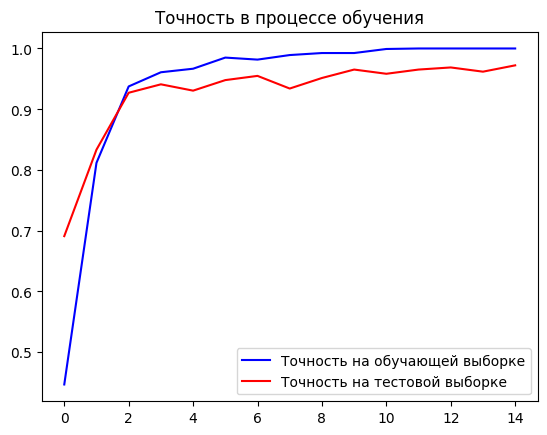

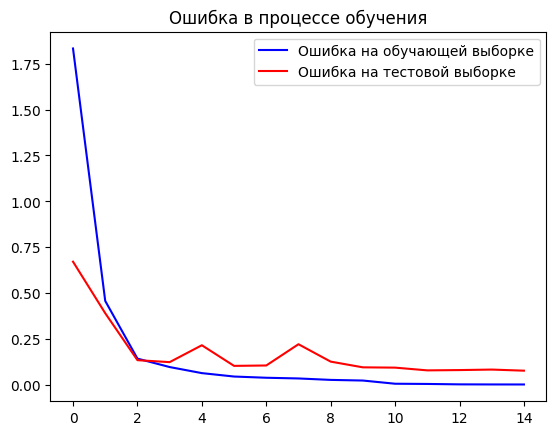

10/10 [==============================] - 8s 763ms/step - loss: 0.0813 - accuracy: 0.9667
Точность на тестовой выборке: 96.67%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

# Проверка обучающей выборки
train_dir = train_data_dir
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                image = Image.open(image_path)
                print(f"Успешно открыто изображение: {image_path}")
            except Exception as e:
                print(f"Ошибка при открытии изображения {image_path}: {e}")

# Проверка обучающей выборки
test_dir = test_data_dir
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    if os.path.isdir(class_dir):
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            try:
                image = Image.open(image_path)
                print(f"Успешно открыто изображение: {image_path}")
            except Exception as e:
                print(f"Ошибка при открытии изображения {image_path}: {e}")

# Генерация данных
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Определение архитектуры нейросети
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
epochs = 15
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Визуализация кривых ошибок
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'b', label='Точность на обучающей выборке')
plt.plot(epochs, val_acc, 'r', label='Точность на тестовой выборке')
plt.title('Точность в процессе обучения')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label='Ошибка на обучающей выборке')
plt.plot(epochs, val_loss, 'r', label='Ошибка на тестовой выборке')
plt.title('Ошибка в процессе обучения')
plt.legend()

plt.show()

# Оценка метрик классификации
_, accuracy = model.evaluate(test_generator)
print(f'Точность на тестовой выборке: {accuracy * 100:.2f}%')

# Сохранение модели
model.save('font_recognition_model.h5')

Создаем файл.py - font_recognition, и вставляем код ниже в данный файл.

Далее код снизу запускаем здесь в Colab

In [10]:
!python font_recognition.py /content/font_recognition_model.h5 /content/output_dir/test/better-vcr-5.2/better-vcr-5.2_17.jpg

2024-04-14 05:05:27.317072: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 05:05:27.317173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 05:05:27.321408: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-14 05:05:28.731598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 0s 251ms/step
Found 1200 images belonging to 15 classes.
Предсказанный шрифт: better-vcr-5.2
Вероятность: 100.00%


In [11]:
!python font_recognition.py /content/font_recognition_model.h5 /content/output_dir/test/GaneshaType-Regular/GaneshaType-Regular_13.jpg

2024-04-14 05:05:39.675358: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 05:05:39.675426: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 05:05:39.676833: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-14 05:05:41.024384: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 0s 243ms/step
Found 1200 images belonging to 15 classes.
Предсказанный шрифт: GaneshaType-Regular
Вероятность: 100.00%


In [12]:
!python font_recognition.py /content/font_recognition_model.h5 /content/output_dir/test/ArefRuqaaInk-Bold/ArefRuqaaInk-Bold_5.jpg

2024-04-14 05:06:01.221406: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 05:06:01.221481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 05:06:01.222846: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-14 05:06:02.540977: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [==============================] - 0s 167ms/step
Found 1200 images belonging to 15 classes.
Предсказанный шрифт: ArefRuqaaInk-Bold
Вероятность: 99.97%


# Создание docker-приложение

In [23]:
# Установка Docker в Colab
!apt-get update
!apt-get install -y docker.io

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
docker.io is already the newest version (24.0.5-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 46 not upgraded.


In [30]:
# Сборка Docker-образа
!docker build -t font_recognition .

DEPRECATED: The legacy builder is deprecated and will be removed in a future release.
            Install the buildx component to build images with BuildKit:
            https://docs.docker.com/go/buildx/

Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?


In [31]:
# Запуск контейнера
!docker run --gpus all -v /content/font_recognition_model.h5 -v /content/output_dir/test/better-vcr-5.2/better-vcr-5.2_17.jpg font_recognition

docker: Cannot connect to the Docker daemon at unix:///var/run/docker.sock. Is the docker daemon running?.
See 'docker run --help'.
